In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'consumer_attention_bound'
varied_param_legend_label = 'Consumer Attention Bound'
varied_param_x_label = 'Consumer Attention Bound'

In [5]:
num_influencers = 1
num_agents = 10

varied_param_values = [0, 1, 10, 30, 80, 120]

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=varied_param_values,
    consumer_external_interest_prob=2,
    delay_sensitivity=1,
    consumer_delay_sensitivity=None,
    influencer_attention_bound=40,
    influencer_delay_sensitivity=None,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method='farthest',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.0014600909998989664s): nit=0, nfev=2, njev=1.
Optimizing producer 1
Optimization succeeded (overall 0.0014104510009929072s): nit=0, nfev=2, njev=1.
Optimizing producer 2
Optimization succeeded (overall 0.0012166520027676597s): nit=0, nfev=2, njev=1.
Optimizing producer 3
Optimization succeeded (overall 0.0011960119991272222s): nit=0, nfev=2, njev=1.
Optimizing producer 4
Optimization succeeded (overall 0.0013031810012762435s): nit=0, nfev=2, njev=1.
Optimizing producer 5
Optimization succeeded (overall 0.0014533100002154242s): nit=0, nfev=2, njev=1.
Optimizing producer 6
Optimization succeeded (overall 0.001430860000255052s): nit=0, nfev=2, njev=1.
Optimizing producer 7
Optimization succeed

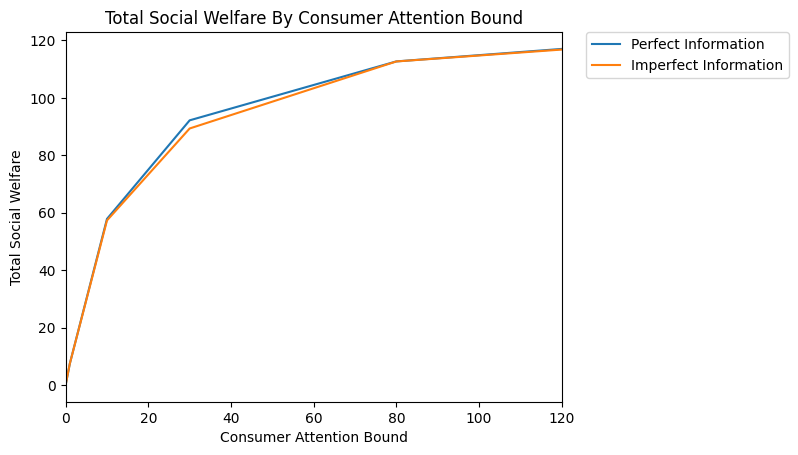

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

In [13]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/home/deck/git/content-market-experiment/visualize.py'>

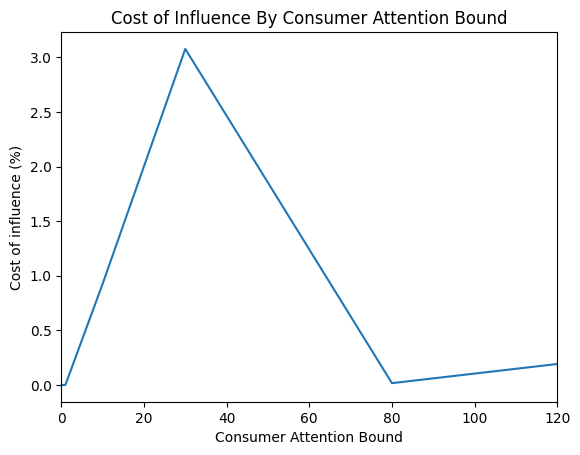

In [14]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

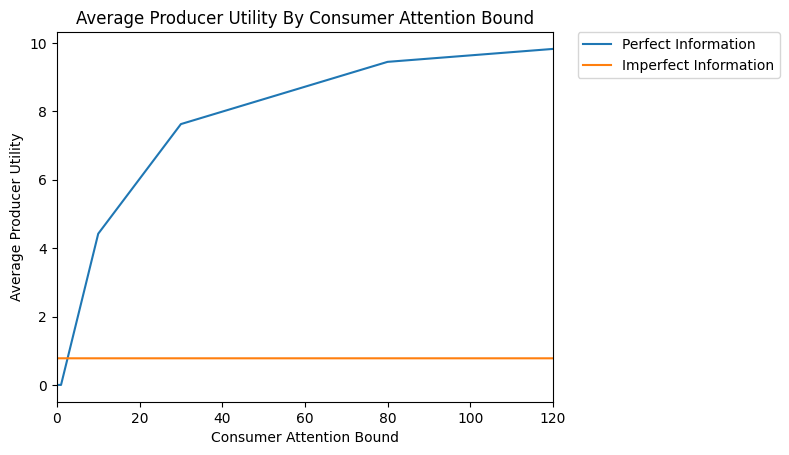

In [15]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

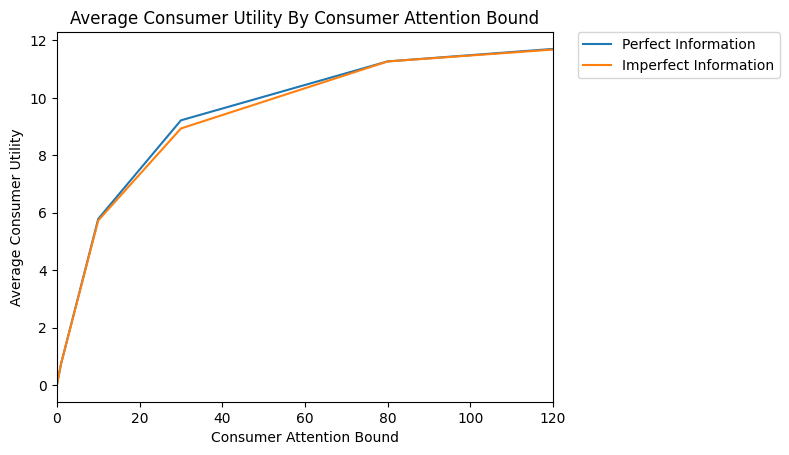

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

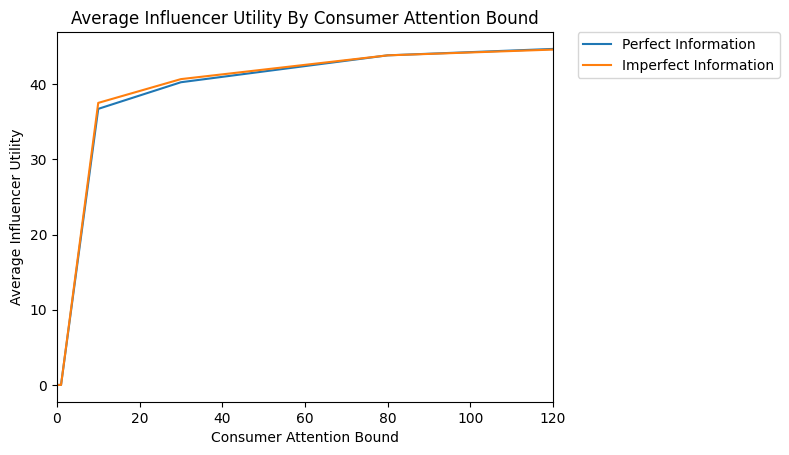

In [17]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

/home/deck/git/content-market-experiment/stats.py:58: RuntimeWarning: invalid value encountered in scalar divide
  return [follow[i] / self.attention_used[i] for i in range(len(follow))]


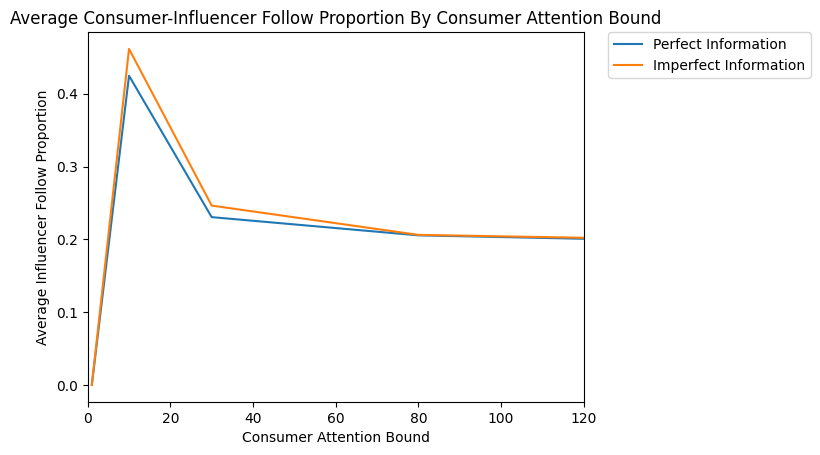

In [18]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

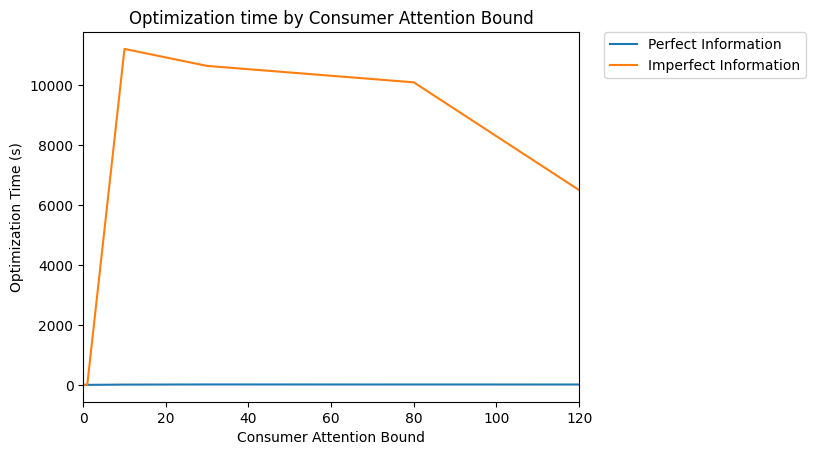

In [19]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

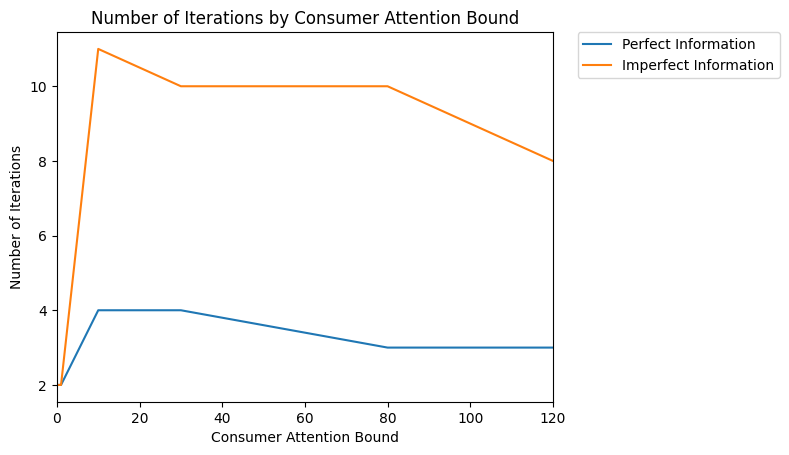

In [20]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

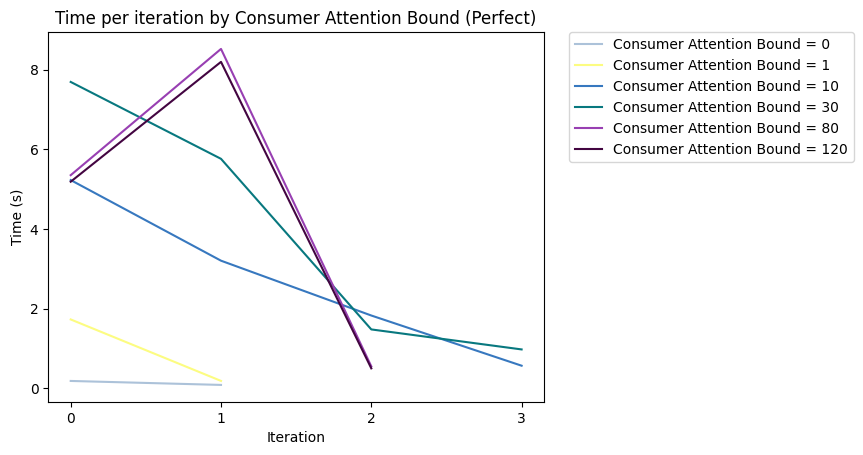

In [21]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

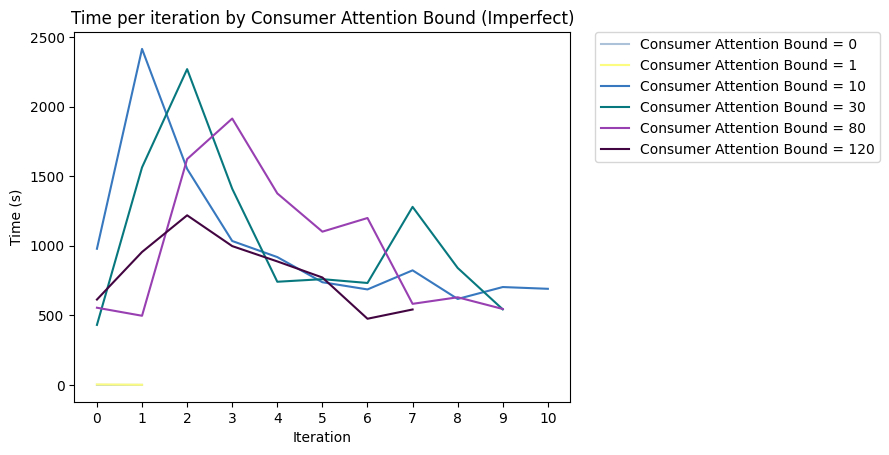

In [22]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

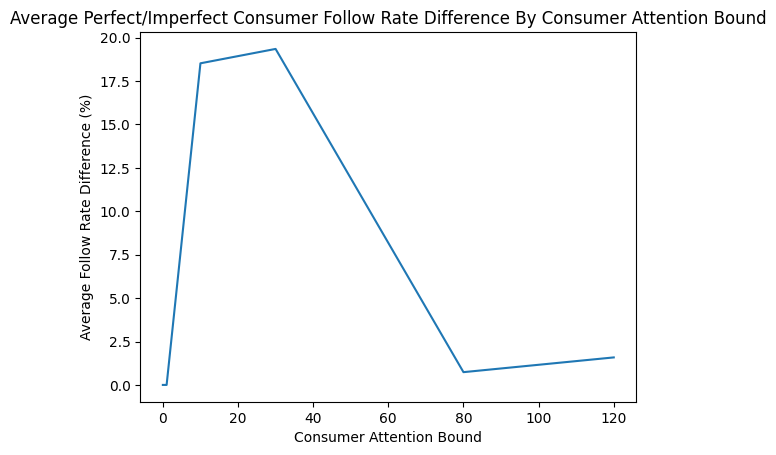

In [23]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1] + 1e-10) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

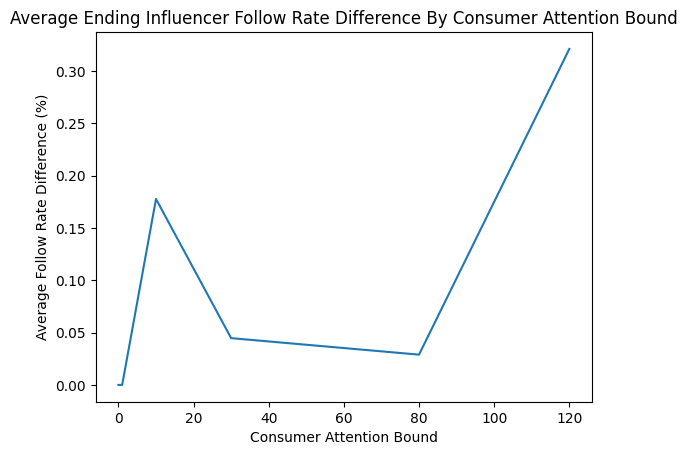

In [24]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

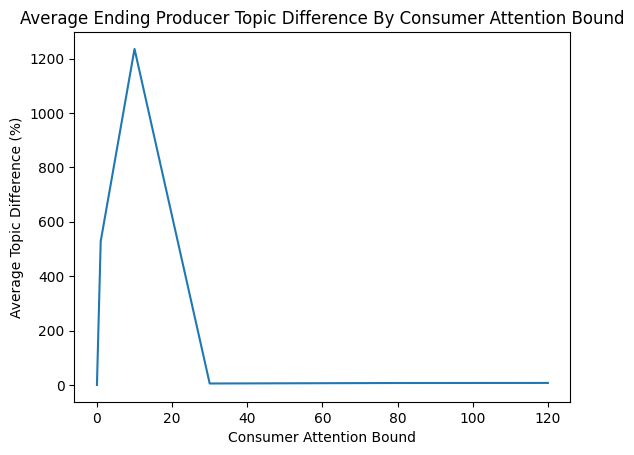

In [25]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
#plt.ylim(0, 10)
plt.show()

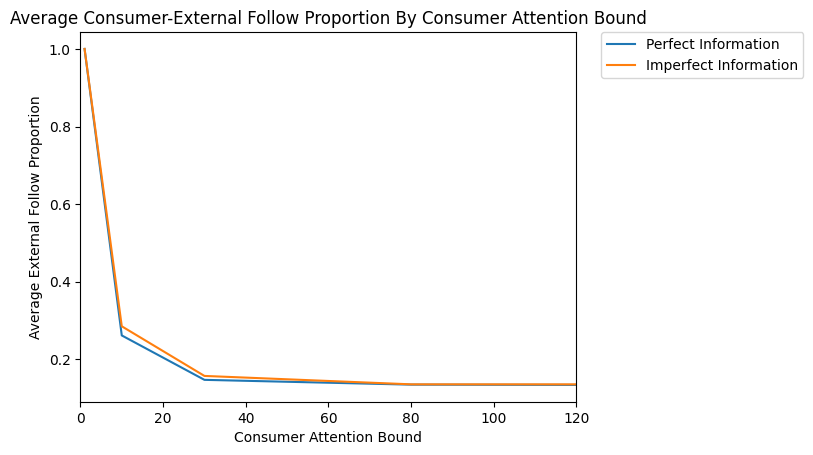

In [26]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

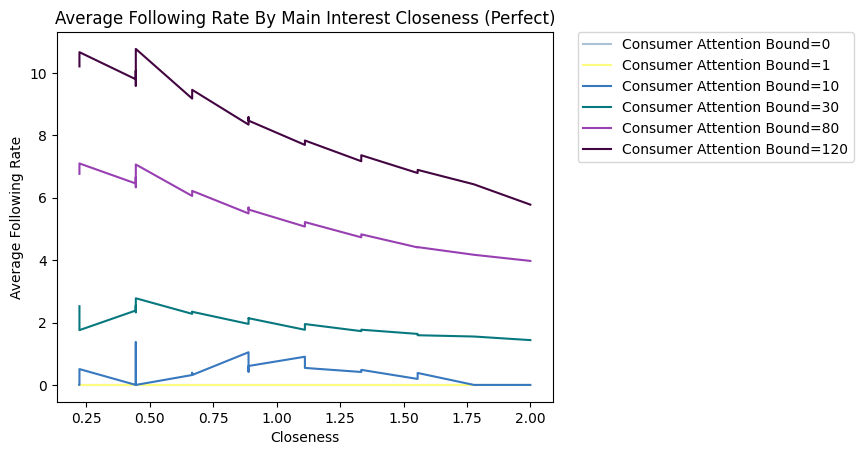

In [27]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/home/deck/git/content-market-experiment/visualize.py:266: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], agent_stats.following_rates[-1][prod.index] / agent.attention_bound * 100) for prod in agent.market.producers if prod != agent]


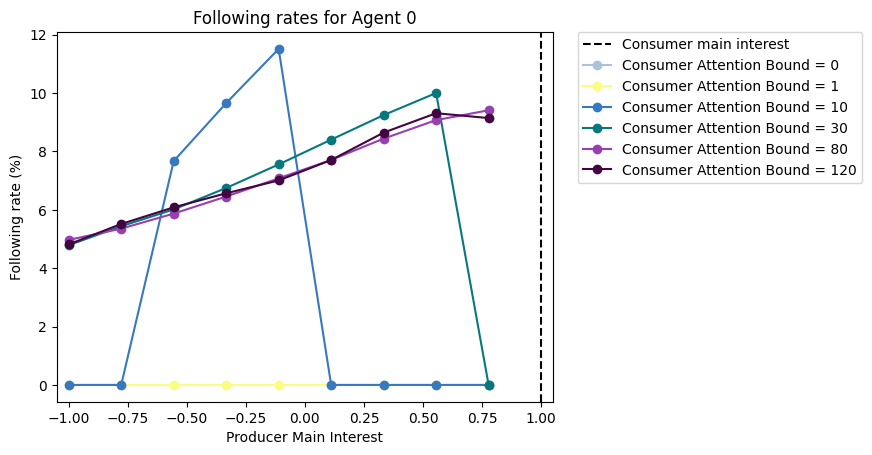

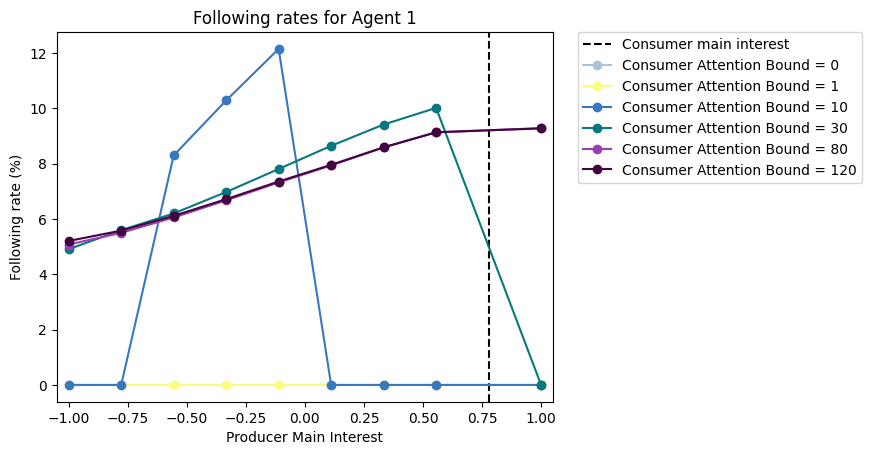

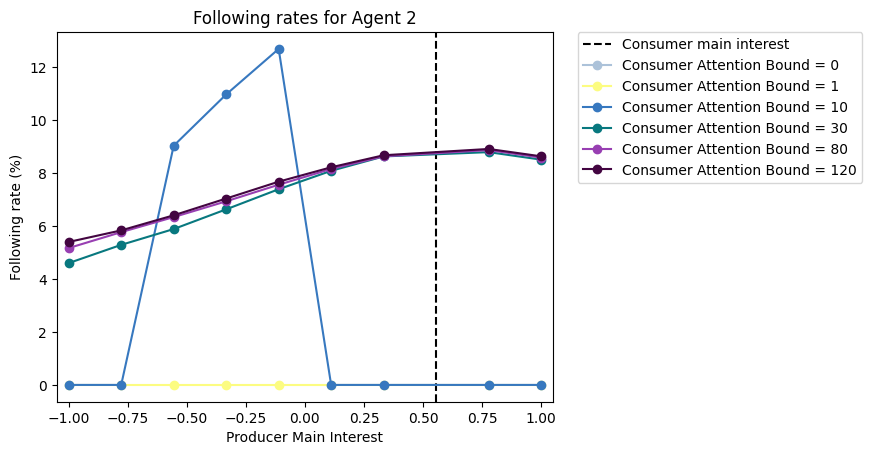

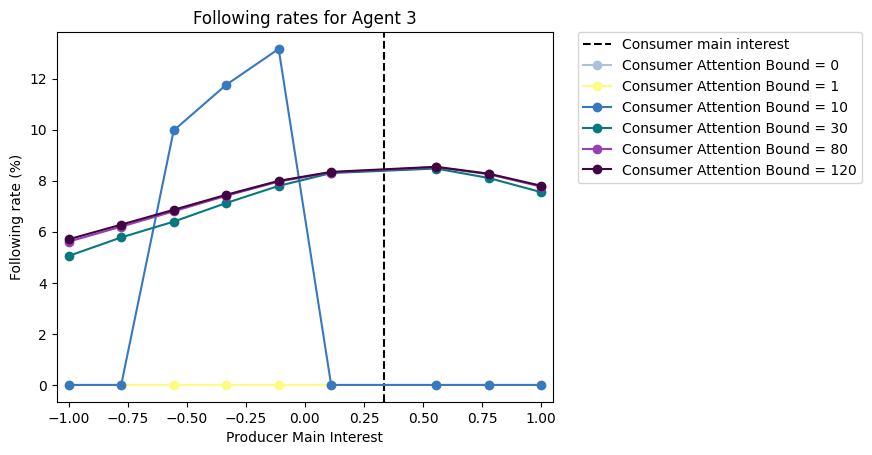

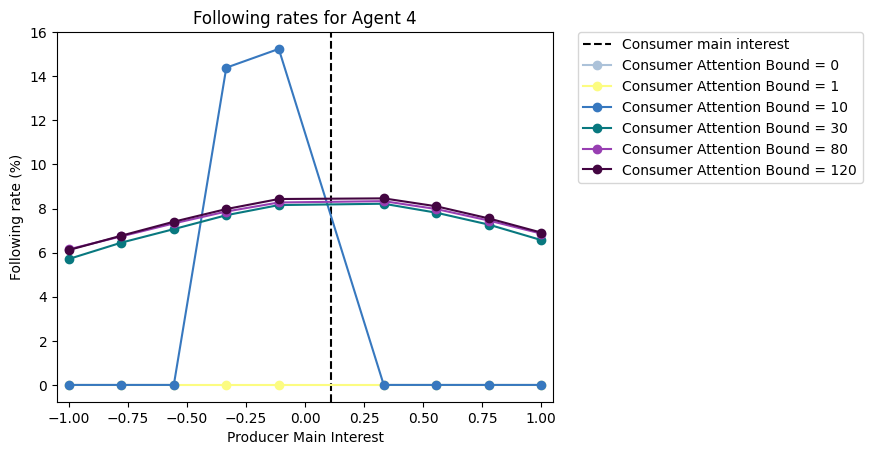

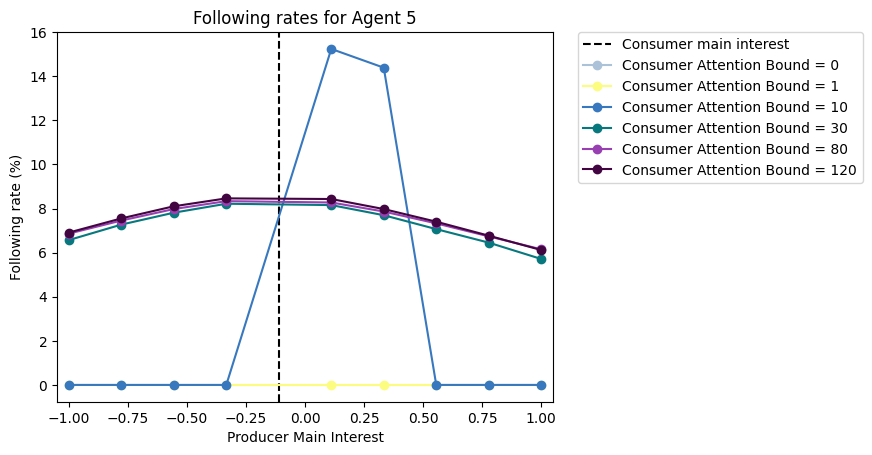

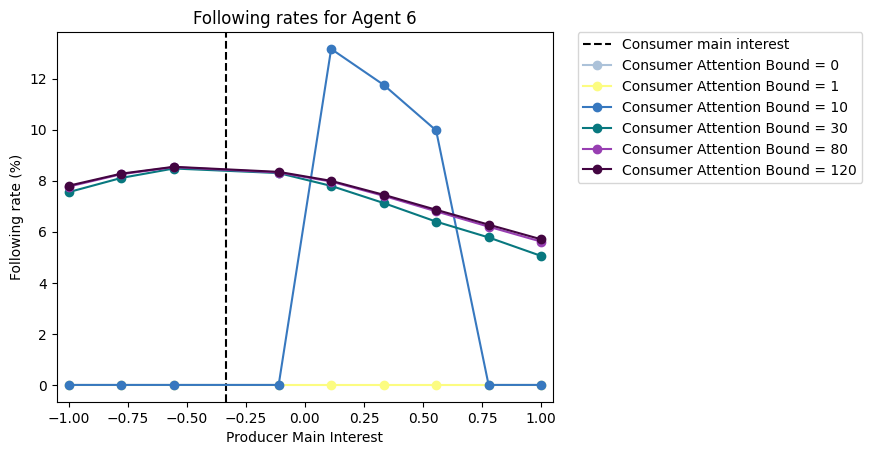

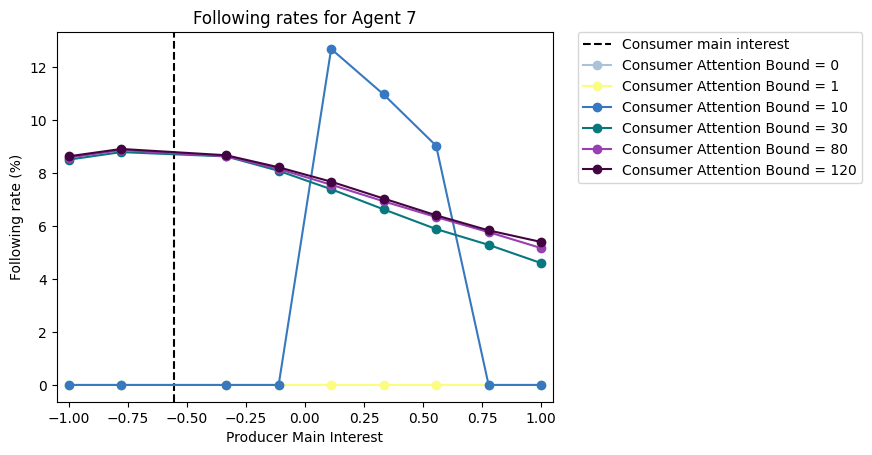

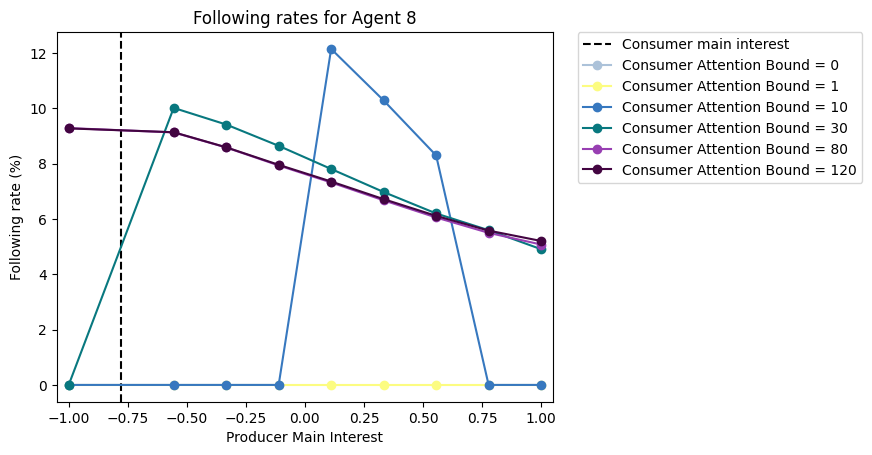

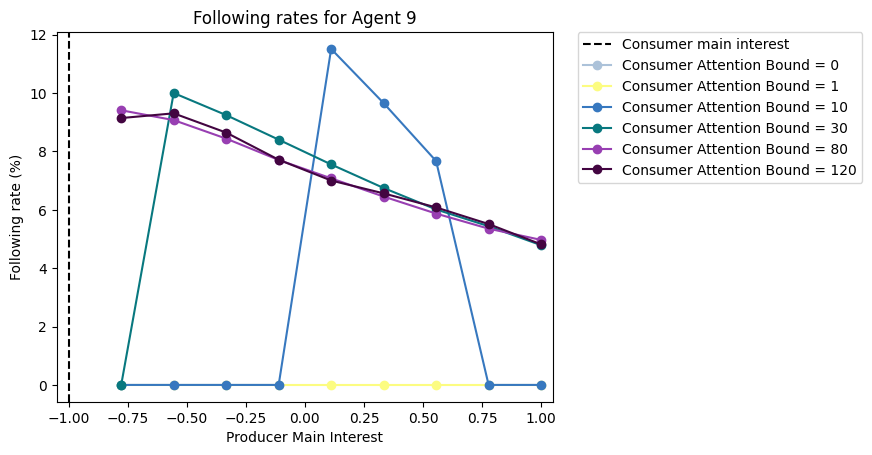

In [28]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

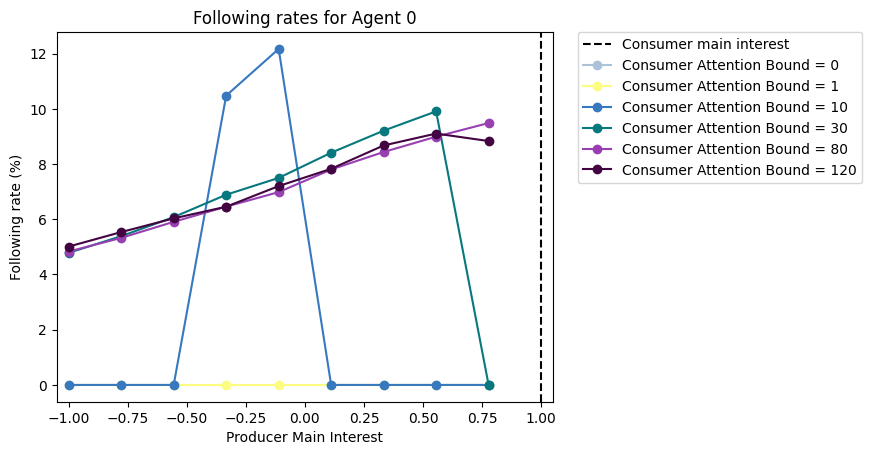

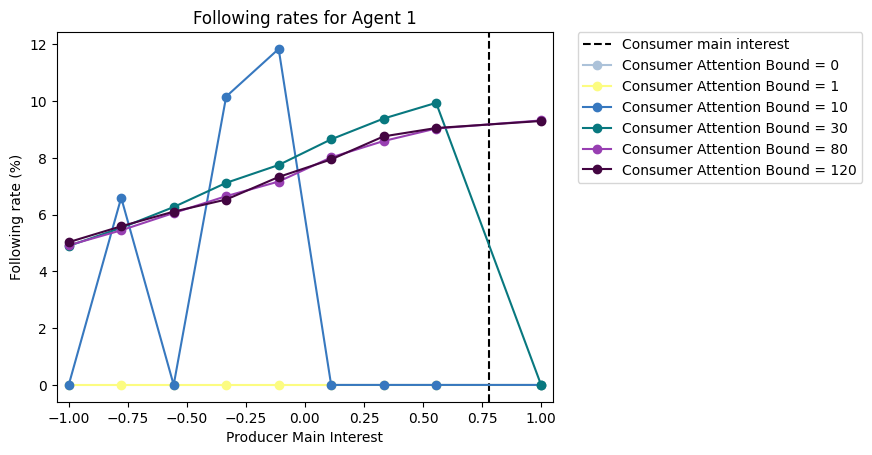

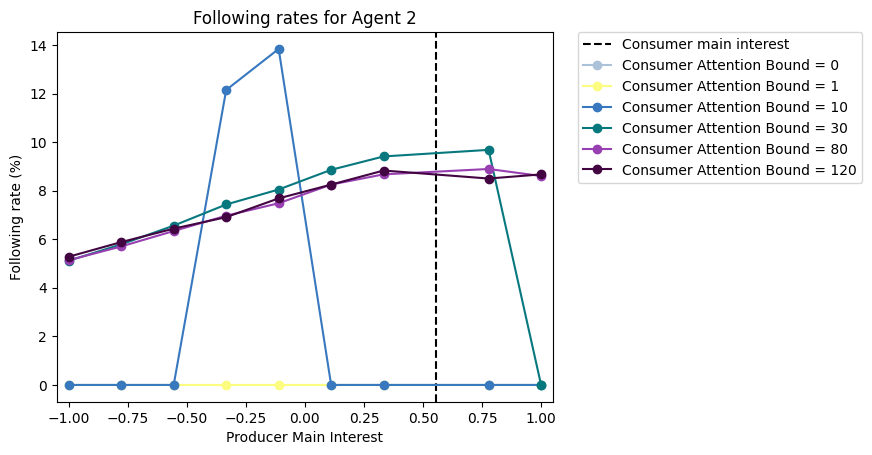

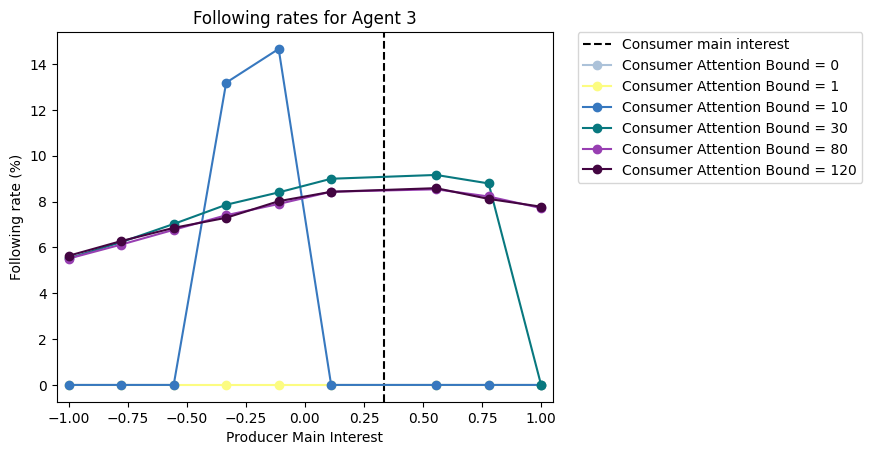

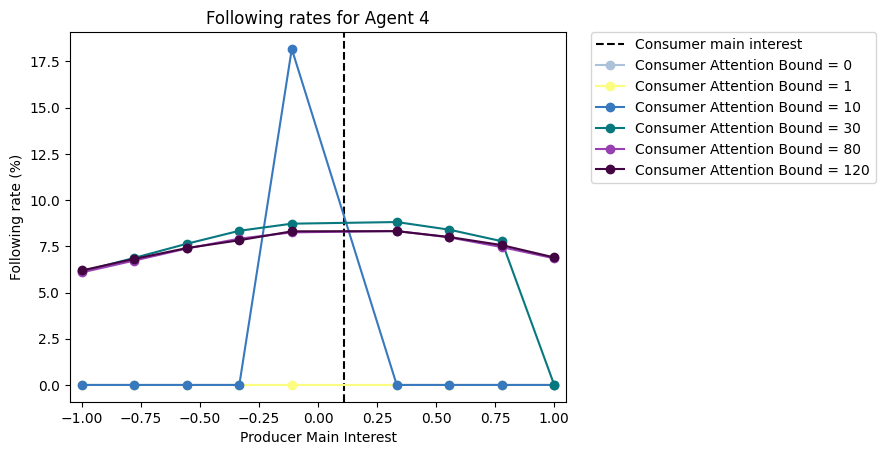

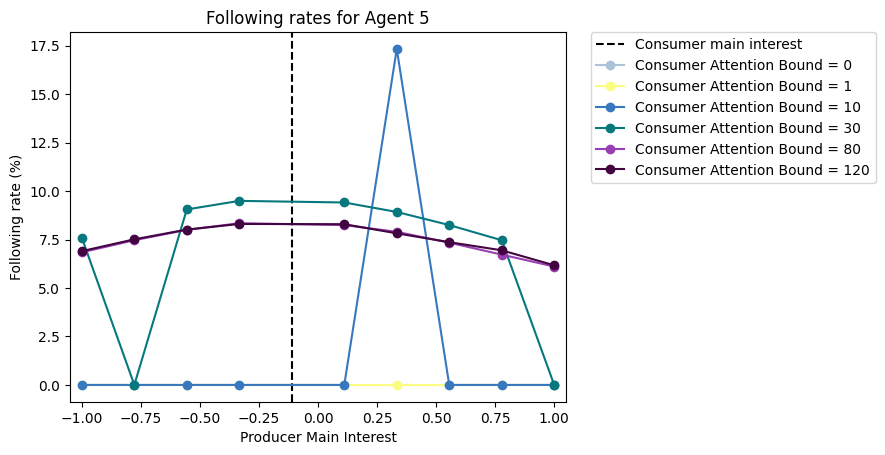

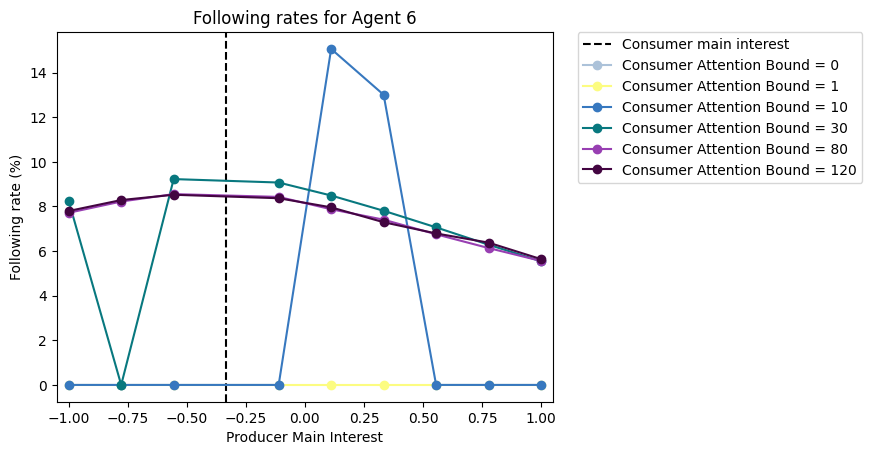

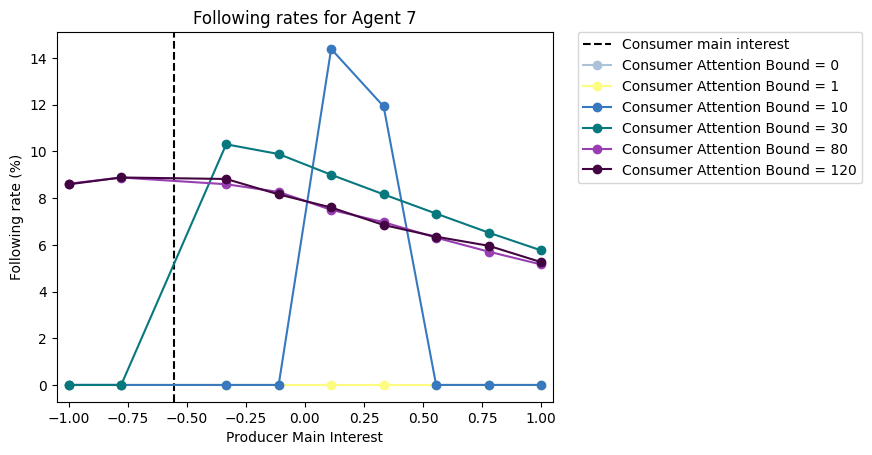

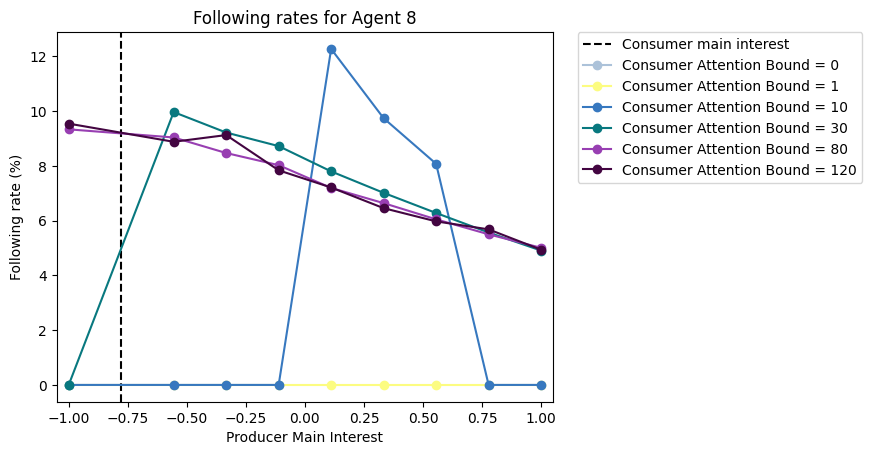

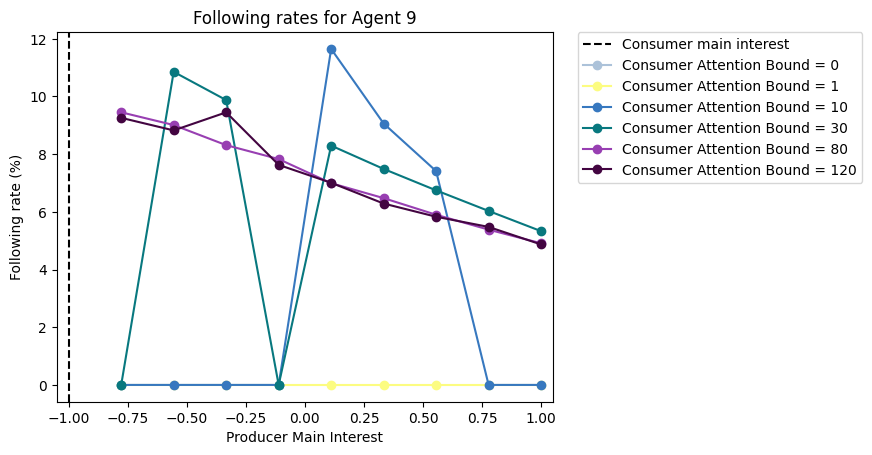

In [29]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

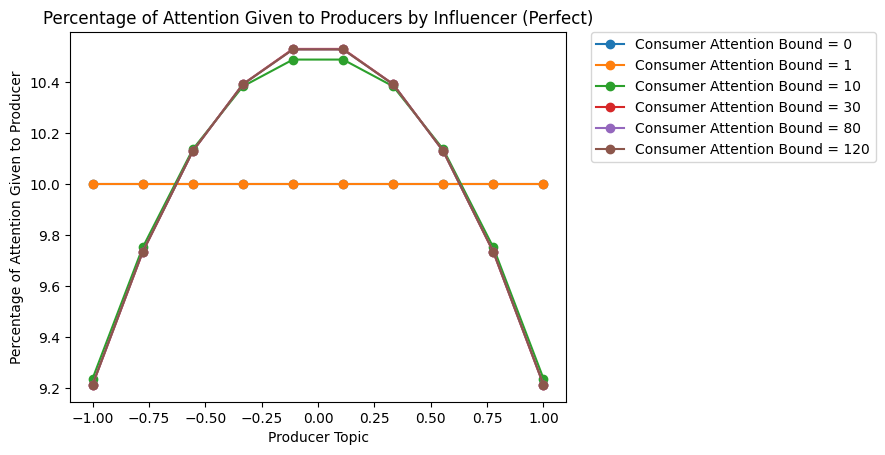

In [30]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0.]
[3.69006408 3.9003946  4.05566151 4.16320599 4.18214653 4.2057533
 4.16177718 4.05175363 3.89861517 3.690628   0.         0.        ]
[3.68550606 3.89205784 4.05075382 4.15793928 4.21219903 4.20937026
 4.15774187 4.05022036 3.89671048 3.687501   0.         0.        ]
[3.68652578 3.8934025  4.05225257 4.15835749 4.21099369 4.210801
 4.15859587 4.04952917 3.8936649  3.68587702 0.         0.        ]
[3.69064441 3.85601317 4.05722277 4.15972358 4.21761566 4.2174425
 4.15578998 4.05696477 3.89788723 3.69069593 0.         0.        ]


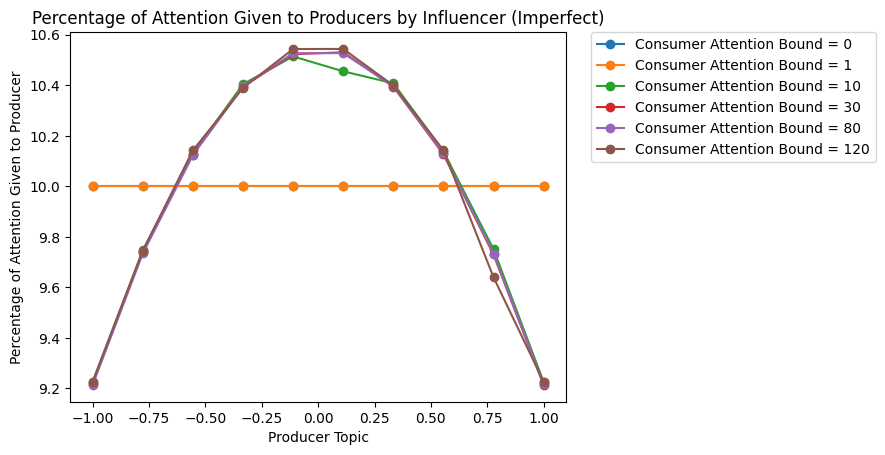

In [31]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [32]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([3.69006408, 3.9003946 , 4.05566151, 4.16320599, 4.18214653,
       4.2057533 , 4.16177718, 4.05175363, 3.89861517, 3.690628  ,
       0.        , 0.        ])

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] 0.0
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] 0.0
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] 0.0
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] 0.0
[3.69519297 3.90083606 4.05478044 4.15359476 4.19558821 4.19558698
 4.15359406 4.05478742 3.90084238 3.69519672] 0.18307707255333402
[3.69006408 3.9003946  4.05566151 4.16320599 4.18214653 4.2057533
 4.16177718 4.05175363 3.89861517 3.690628  ] 0.18602900381753792
[3.68528082 3.89345642 4.05196703 4.15700716 4.21229364 4.21229183
 4.1570039  4.05196392 3.89345795 3.68527734] 0.1912171449009748
[3.68550606 3.89205784 4.05075382 4.15793928 4.21219903 4.20937026
 4.15774187 4.05022036 3.89671048 3.687501  ] 0.19043948540165373
[3.68577375 3.89401656 4.05183009 4.15677177 4.21160228 4.21160031
 4.15677531 4.05183367 3.8940206  3.68577566] 0.19079265825571604
[3.68652578 3.8934025  4.05225257 4.15835749 4.21099369 4.210801
 4.15859587 4.04952917 3.8936649  3.68587702] 0.19078210641170593
[3.6858853  3.89411828 4.05186333 4.15671974 4.21141503 4.2114

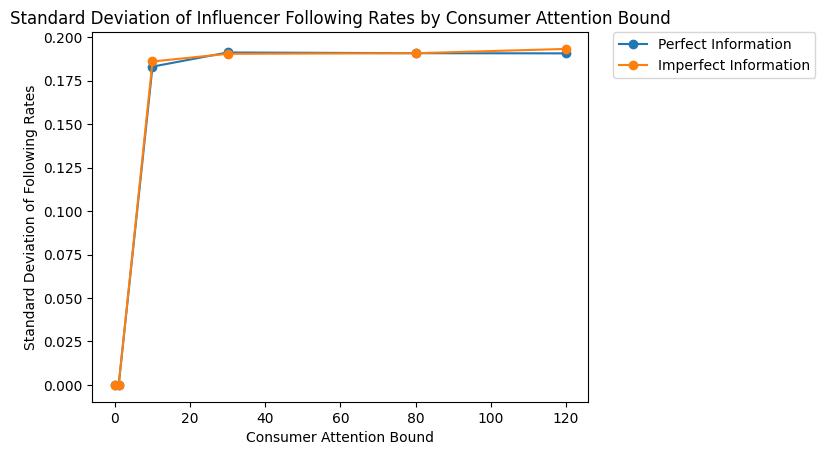

In [34]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

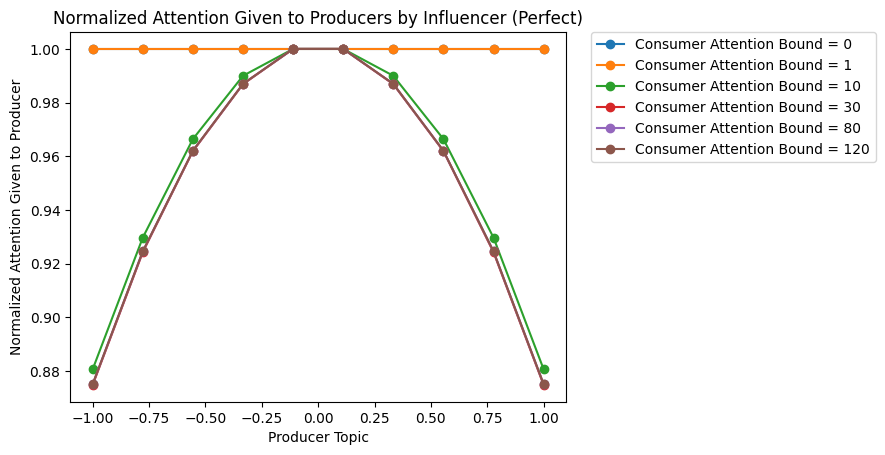

In [35]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

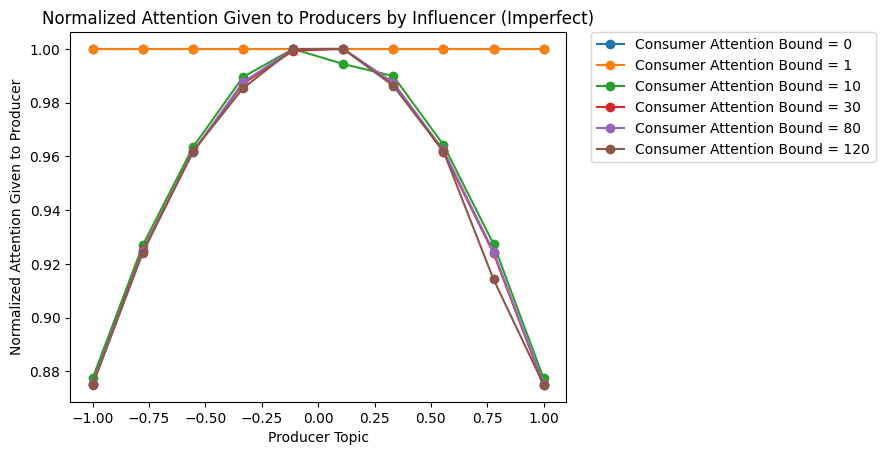

In [36]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

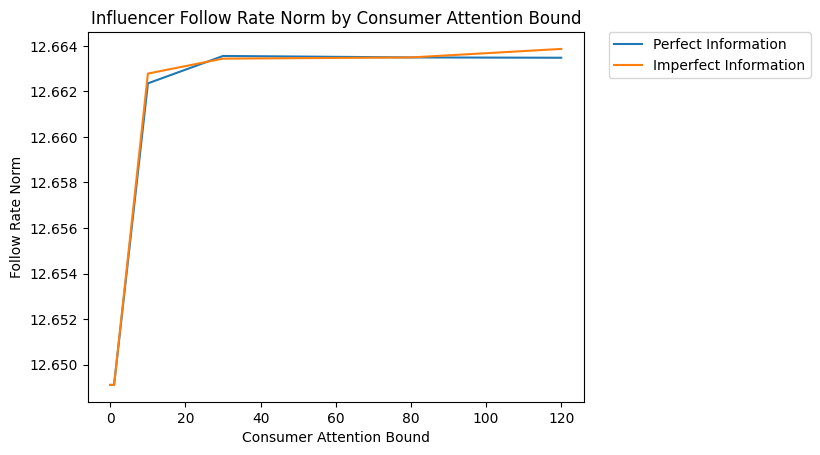

In [37]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

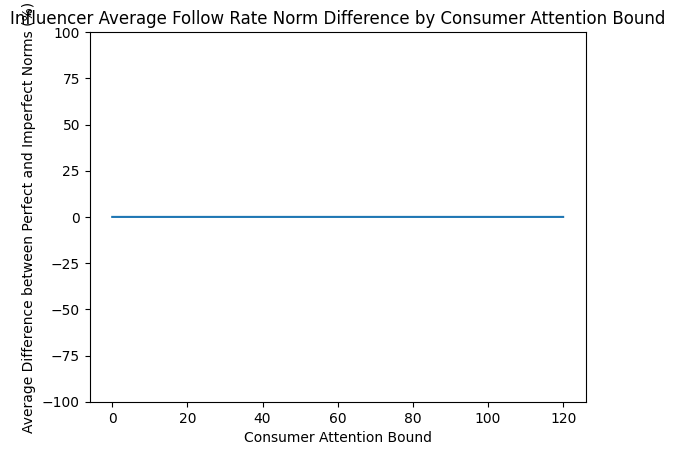

In [38]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

0.9999999999999998
0.9999999999999998
0.9999984236650082
0.9999999002691548
0.9999999581987561
0.9999948517795568


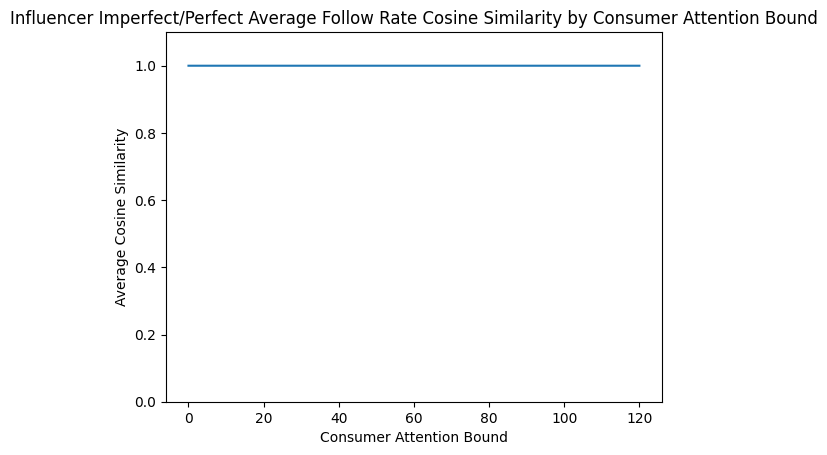

In [39]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

/tmp/ipykernel_1782/1839493182.py:11: RuntimeWarning: invalid value encountered in scalar divide
  avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100


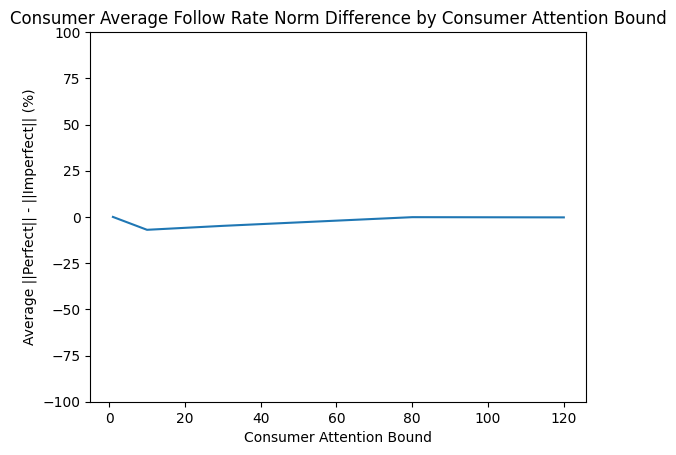

In [40]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

/tmp/ipykernel_1782/2512088061.py:9: RuntimeWarning: invalid value encountered in scalar divide
  avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))


[nan, 1.0, 0.9831355456234749, 0.9762642999453351, 0.9999733004997025, 0.9998544120666791]


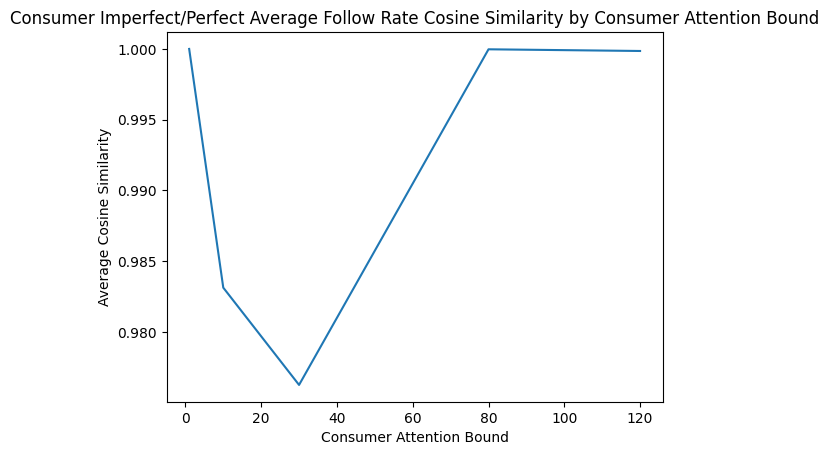

In [41]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [42]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 0, 0], 'total_producer_utility': [0, 0, 0], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 0, 0], 'average_consumer_rate_change': [0, 0.0, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 0.0, 0.0], 'average_producer_utility_change': [0, 0.0, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 0, 0], 'utility_change': [0, 0, 0], 'optimization_times': [0.10031939200052875, 0.007028164000075776], 'agent': {'following_rates': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 'external': 0.0}, 'index': 0, 'optimize_tolerance': None, 'main_interest': array([1.]), 'attention_bound': 0, 'external_interest_prob': 2, 'delay_sensitivity': 1, 'init_following_rates_method': 'equal', 'topic_produced': array([-1.])}, 'index': 0, 'following_rates': [arra

In [43]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 0, 0], 'total_producer_utility': [0, 7.788007830714047, 7.788007830714047], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 0, 0], 'average_consumer_rate_change': [0, 0.0, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 0.0, 0.0], 'average_producer_utility_change': [0, 0.7788007830714048, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 0, 0], 'utility_change': [0, 0, 0], 'optimization_times': [0.003825531999609666, 0.0035128029994666576], 'agent': {'following_rates': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 'external': 0.0}, 'index': 0, 'optimize_tolerance': None, 'main_interest': array([1.]), 'attention_bound': 0, 'external_interest_prob': 2, 'delay_sensitivity': 1, 'init_following_rates_method': 'equal', 'topic_produced': ar